<a href="https://colab.research.google.com/github/AndrewHolm/acceleration-classification/blob/main/acceleration_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt


In [2]:
not_moving =[1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.01 ,0.97 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.03 ,0.97 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.02 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.98 ,1.03 ,0.98 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.03 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.98 ,1.03 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.03 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.03 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.03 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.97 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.03 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.03 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.02 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.02 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.02 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.02 ,0.97 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.02 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.01 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.02 ,0.97 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.03 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.02 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.02 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.02 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.02 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.01 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.02 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.03 ,0.97 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.98 ,1.03 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.01 ,0.99 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.05 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.02 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.02 ,0.97 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.03 ,0.97 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.02 ,0.97 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.03 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.03 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.02 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.02 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.97 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.02 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.02 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.03 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.98 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.02 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.98 ,1.02 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.02 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.03 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.98 ,1.02 ,0.97 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.98 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.98 ,1.02 ,1.03 ,0.95 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.98 ,1.05 ,0.95 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.98 ,1.01 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.98 ,0.99 ,1.00 ,0.96 ,1.01 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.04 ,0.98 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.03 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.98 ,1.03 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.97 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00]

moving = [1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.59 ,1.37 ,0.93 ,1.04 ,1.13 ,0.97 ,0.96 ,1.01 ,0.98 ,1.00 ,0.96 ,1.00 ,1.01 ,0.98 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.16 ,0.98 ,0.97 ,1.10 ,0.88 ,0.95 ,1.00 ,1.01 ,0.96 ,1.00 ,1.01 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.85 ,1.37 ,0.94 ,1.04 ,0.99 ,0.95 ,0.99 ,1.00 ,0.98 ,1.01 ,0.96 ,1.00 ,1.01 ,0.98 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.40 ,0.69 ,0.92 ,1.05 ,1.08 ,1.01 ,1.00 ,1.01 ,1.00 ,1.02 ,0.95 ,1.00 ,1.00 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.52 ,0.90 ,1.00 ,0.93 ,0.90 ,1.02 ,1.00 ,0.97 ,0.99 ,0.97 ,1.01 ,1.02 ,0.98 ,0.99 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.55 ,1.23 ,0.96 ,1.06 ,1.03 ,0.97 ,0.97 ,1.00 ,0.98 ,1.00 ,0.95 ,1.02 ,1.02 ,0.97 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.81 ,0.87 ,0.93 ,1.02 ,1.16 ,0.94 ,0.98 ,1.00 ,0.99 ,1.00 ,0.97 ,1.00 ,1.01 ,0.98 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.30 ,0.74 ,0.93 ,0.89 ,1.00 ,1.04 ,1.00 ,1.00 ,0.99 ,1.02 ,0.99 ,1.01 ,0.97 ,1.00 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.96 ,1.56 ,0.83 ,1.00 ,0.90 ,0.92 ,1.02 ,0.99 ,0.98 ,0.97 ,0.97 ,1.00 ,1.02 ,0.97 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.96 ,1.01 ,1.00 ,1.04 ,0.89 ,1.07 ,0.98 ,1.00 ,0.96 ,1.02 ,0.98 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.77 ,0.82 ,0.95 ,0.89 ,1.11 ,0.99 ,0.98 ,0.99 ,1.01 ,1.02 ,0.99 ,1.00 ,1.01 ,0.98 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.84 ,0.73 ,0.98 ,0.87 ,0.89 ,1.06 ,0.98 ,0.98 ,0.99 ,0.98 ,1.00 ,1.00 ,0.97 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.79 ,0.71 ,0.99 ,0.90 ,1.06 ,1.08 ,0.97 ,0.98 ,1.03 ,1.00 ,0.99 ,1.00 ,0.98 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.98 ,1.01 ,0.96 ,1.01 ,1.19 ,0.91 ,0.95 ,0.99 ,1.04 ,1.00 ,0.99 ,1.01 ,1.01 ,0.98 ,1.01 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.38 ,0.94 ,0.98 ,1.01 ,0.88 ,0.98 ,0.98 ,0.99 ,0.97 ,1.00 ,1.00 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,1.51 ,0.89 ,1.00 ,0.91 ,0.91 ,1.02 ,0.99 ,0.97 ,1.00 ,0.98 ,1.01 ,1.01 ,0.98 ,1.00 ,0.99 ,1.00 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.32 ,0.84 ,1.01 ,0.97 ,1.16 ,1.09 ,0.96 ,1.00 ,1.05 ,0.98 ,0.97 ,1.00 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.74 ,0.69 ,0.97 ,0.88 ,1.09 ,1.08 ,0.97 ,0.98 ,1.03 ,1.01 ,0.98 ,1.00 ,0.98 ,0.99 ,0.98 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.58 ,0.77 ,1.03 ,0.89 ,0.87 ,1.08 ,0.97 ,0.97 ,1.03 ,1.01 ,0.98 ,1.01 ,0.98 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.34 ,0.84 ,1.00 ,0.91 ,1.00 ,1.07 ,0.99 ,1.00 ,1.01 ,1.02 ,0.96 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.96 ,1.44 ,0.96 ,1.00 ,0.95 ,0.92 ,1.01 ,1.02 ,0.98 ,0.98 ,0.99 ,1.00 ,1.01 ,0.98 ,1.01 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.40 ,0.79 ,1.02 ,0.91 ,1.14 ,1.09 ,0.95 ,0.98 ,1.04 ,1.00 ,0.97 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.03 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.34 ,0.97 ,1.01 ,1.01 ,0.98 ,0.95 ,0.99 ,1.00 ,0.96 ,0.96 ,1.01 ,1.02 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.35 ,1.15 ,0.97 ,1.00 ,0.98 ,1.06 ,0.93 ,0.97 ,1.05 ,1.02 ,0.98 ,1.01 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.09 ,0.97 ,1.00 ,1.15 ,1.05 ,0.93 ,1.00 ,1.04 ,0.99 ,0.97 ,1.00 ,1.02 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.37 ,0.76 ,0.98 ,0.88 ,1.05 ,1.02 ,0.99 ,0.98 ,0.99 ,1.02 ,0.99 ,1.00 ,0.99 ,0.98 ,1.01 ,1.00 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.21 ,0.85 ,0.98 ,0.92 ,0.90 ,1.08 ,0.96 ,0.97 ,1.02 ,0.99 ,0.98 ,1.00 ,0.98 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.24 ,0.97 ,0.99 ,1.12 ,0.92 ,0.96 ,1.00 ,1.04 ,0.99 ,0.98 ,1.00 ,1.03 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.59 ,0.72 ,0.94 ,0.92 ,1.11 ,1.01 ,0.98 ,0.97 ,0.99 ,1.02 ,0.98 ,1.01 ,1.00 ,0.97 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.07 ,1.02 ,0.95 ,1.03 ,1.01 ,0.94 ,0.97 ,0.99 ,0.99 ,0.97 ,0.99 ,1.02 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.76 ,0.90 ,0.85 ,1.01 ,1.00 ,0.99 ,1.00 ,0.97 ,0.98 ,0.98 ,0.98 ,1.00 ,1.00 ,0.97 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.37 ,0.88 ,0.84 ,0.97 ,1.00 ,1.01 ,1.02 ,0.99 ,1.03 ,0.99 ,1.00 ,1.01 ,1.00 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.59 ,0.84 ,0.84 ,0.96 ,1.00 ,1.04 ,1.02 ,0.97 ,1.02 ,0.98 ,0.99 ,1.01 ,1.00 ,0.97 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.97 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.01 ,0.97 ,1.10 ,0.98 ,0.95 ,0.96 ,0.99 ,1.01 ,1.00 ,1.00 ,1.02 ,0.99 ,1.00 ,1.00 ,0.98 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.48 ,1.07 ,1.03 ,1.06 ,0.99 ,0.98 ,1.02 ,1.01 ,1.01 ,0.99 ,1.00 ,1.01 ,1.00 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.42 ,0.80 ,0.83 ,0.97 ,0.99 ,1.02 ,1.01 ,0.95 ,1.01 ,0.99 ,0.97 ,1.00 ,1.00 ,0.97 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.53 ,0.97 ,1.00 ,1.03 ,1.00 ,1.01 ,0.97 ,1.02 ,1.00 ,1.00 ,1.00 ,1.02 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,2.05 ,0.85 ,1.03 ,0.97 ,0.99 ,1.02 ,1.02 ,1.02 ,1.01 ,1.00 ,0.99 ,1.00 ,0.99 ,0.97 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.43 ,0.89 ,0.93 ,0.91 ,0.97 ,1.06 ,0.99 ,1.01 ,1.00 ,0.99 ,0.97 ,1.02 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.97 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.35 ,0.98 ,0.85 ,0.94 ,1.06 ,1.01 ,0.94 ,0.96 ,1.00 ,1.00 ,0.97 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.89 ,0.93 ,1.03 ,0.99 ,1.00 ,1.02 ,1.02 ,1.02 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.97 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.96 ,0.97 ,0.88 ,0.94 ,1.00 ,1.05 ,0.96 ,0.95 ,1.00 ,0.99 ,0.97 ,0.99 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.28 ,0.95 ,0.89 ,0.93 ,0.99 ,1.05 ,1.02 ,1.00 ,1.00 ,0.99 ,0.97 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.71 ,1.07 ,0.96 ,0.94 ,1.01 ,1.05 ,1.00 ,1.02 ,1.01 ,1.00 ,0.98 ,1.02 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.78 ,1.03 ,1.01 ,1.07 ,1.01 ,0.96 ,0.98 ,1.02 ,1.00 ,1.00 ,1.00 ,1.02 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.60 ,1.10 ,0.93 ,0.94 ,1.00 ,1.04 ,1.01 ,1.02 ,1.01 ,1.00 ,0.97 ,1.02 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.22 ,0.94 ,0.84 ,0.93 ,0.98 ,1.03 ,0.96 ,0.99 ,1.00 ,0.99 ,0.97 ,1.01 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.95 ,0.97 ,0.92 ,1.04 ,1.03 ,0.99 ,0.97 ,0.95 ,1.01 ,1.00 ,1.00 ,1.00 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.30 ,0.81 ,0.80 ,0.96 ,0.97 ,1.03 ,1.02 ,0.97 ,1.00 ,0.99 ,0.97 ,1.01 ,1.00 ,0.97 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.47 ,1.07 ,0.89 ,1.06 ,0.99 ,0.98 ,1.02 ,1.01 ,1.01 ,0.99 ,1.00 ,1.01 ,1.00 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.21 ,1.13 ,1.03 ,1.10 ,1.00 ,0.95 ,1.01 ,1.00 ,1.01 ,0.98 ,1.00 ,1.02 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.35 ,0.80 ,0.83 ,0.97 ,0.98 ,1.02 ,1.02 ,0.97 ,1.00 ,0.99 ,0.97 ,1.00 ,1.00 ,0.97 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.70 ,0.83 ,0.85 ,0.90 ,1.01 ,1.01 ,1.00 ,0.95 ,1.00 ,1.00 ,0.98 ,1.00 ,1.01 ,0.97 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.40 ,1.08 ,0.90 ,1.08 ,1.00 ,0.98 ,1.02 ,1.01 ,1.01 ,0.99 ,1.00 ,1.01 ,1.00 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.70 ,0.95 ,1.03 ,0.97 ,1.00 ,1.01 ,1.01 ,1.01 ,1.00 ,1.00 ,0.99 ,1.03 ,1.00 ,0.97 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.77 ,1.21 ,0.87 ,1.02 ,0.98 ,0.99 ,0.95 ,0.95 ,1.00 ,0.98 ,0.99 ,1.00 ,1.01 ,1.00 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.49 ,1.10 ,0.95 ,1.11 ,1.00 ,1.05 ,1.01 ,1.02 ,1.01 ,1.00 ,1.01 ,1.03 ,0.99 ,0.99 ,1.00 ,0.98 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.38 ,1.09 ,0.98 ,1.12 ,1.00 ,1.05 ,1.01 ,1.02 ,1.01 ,1.00 ,0.97 ,1.02 ,0.99 ,0.99 ,1.00 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.75 ,1.00 ,1.05 ,1.00 ,1.01 ,1.04 ,0.99 ,1.02 ,1.00 ,1.00 ,0.99 ,1.03 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.09 ,0.98 ,1.00 ,1.12 ,0.90 ,0.95 ,0.98 ,0.97 ,0.96 ,0.99 ,1.01 ,1.03 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.52 ,0.81 ,0.99 ,0.97 ,0.93 ,1.03 ,1.01 ,1.00 ,0.97 ,0.98 ,1.00 ,1.02 ,0.98 ,0.99 ,0.99 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.63 ,0.74 ,0.95 ,0.91 ,1.09 ,1.00 ,0.96 ,0.98 ,1.03 ,1.01 ,0.98 ,1.00 ,1.01 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.41 ,1.18 ,1.01 ,0.96 ,1.13 ,1.04 ,0.94 ,0.99 ,1.04 ,0.97 ,0.96 ,1.01 ,1.00 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.92 ,1.55 ,0.93 ,1.02 ,0.87 ,0.94 ,1.01 ,0.98 ,0.99 ,0.99 ,0.97 ,1.00 ,1.02 ,0.97 ,1.01 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.72 ,0.71 ,1.00 ,0.90 ,0.90 ,1.09 ,0.98 ,0.98 ,1.04 ,1.01 ,0.97 ,1.02 ,0.98 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.90 ,0.91 ,0.96 ,1.00 ,1.15 ,0.94 ,0.96 ,0.99 ,1.04 ,0.99 ,0.96 ,1.01 ,1.02 ,0.98 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.86 ,0.79 ,0.99 ,0.89 ,0.89 ,1.06 ,0.98 ,0.98 ,1.02 ,1.00 ,0.99 ,1.02 ,0.98 ,0.98 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.70 ,0.88 ,1.02 ,0.91 ,1.01 ,1.05 ,0.98 ,0.98 ,1.02 ,1.01 ,0.99 ,1.01 ,0.98 ,0.99 ,0.99 ,1.00 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.28 ,1.00 ,0.99 ,1.05 ,0.89 ,0.98 ,0.99 ,0.99 ,0.97 ,1.01 ,1.02 ,1.01 ,0.98 ,1.00 ,1.00 ,0.98 ,1.00 ,1.01 ,0.99 ,1.02 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.46 ,1.21 ,0.89 ,1.03 ,1.10 ,0.99 ,0.97 ,1.00 ,1.00 ,1.00 ,0.96 ,1.02 ,1.01 ,0.98 ,1.02 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.50 ,0.98 ,0.95 ,1.01 ,0.94 ,1.07 ,0.99 ,1.00 ,1.04 ,1.01 ,0.96 ,1.00 ,0.99 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.63 ,0.99 ,0.99 ,0.91 ,0.89 ,1.08 ,0.99 ,0.97 ,0.97 ,1.00 ,0.97 ,1.01 ,0.99 ,1.00 ,1.00 ,0.97 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.55 ,0.80 ,0.97 ,0.96 ,0.92 ,1.07 ,0.95 ,1.00 ,1.04 ,1.01 ,0.96 ,1.01 ,0.99 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.11 ,0.97 ,1.04 ,1.04 ,0.90 ,0.97 ,0.97 ,0.99 ,0.98 ,1.01 ,1.02 ,1.02 ,0.97 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.94 ,0.66 ,0.98 ,0.93 ,1.14 ,1.08 ,0.95 ,1.00 ,1.04 ,1.02 ,0.96 ,1.02 ,0.99 ,0.97 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.92 ,0.96 ,0.99 ,1.11 ,0.90 ,0.95 ,0.98 ,0.99 ,0.97 ,1.00 ,1.02 ,1.02 ,0.98 ,1.01 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.95 ,0.70 ,0.99 ,0.95 ,0.89 ,1.08 ,0.98 ,1.00 ,1.04 ,1.01 ,0.96 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.42 ,1.04 ,1.00 ,0.96 ,0.95 ,1.00 ,0.97 ,0.98 ,1.00 ,0.98 ,1.00 ,1.01 ,0.98 ,0.99 ,0.99 ,1.00 ,1.00 ,1.01 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.97 ,1.03 ,0.95 ,1.02 ,1.16 ,1.05 ,0.95 ,0.98 ,1.02 ,0.98 ,0.96 ,1.02 ,1.01 ,0.97 ,1.01 ,1.00 ,0.98 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.80 ,1.40 ,0.93 ,1.02 ,0.96 ,0.96 ,1.01 ,0.98 ,0.98 ,0.98 ,0.98 ,1.00 ,1.01 ,0.98 ,1.01 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.35 ,0.60 ,0.86 ,0.91 ,1.10 ,1.01 ,0.96 ,0.99 ,1.03 ,0.99 ,0.96 ,1.02 ,1.00 ,0.98 ,1.02 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.84 ,0.66 ,0.88 ,0.92 ,1.13 ,1.07 ,0.97 ,0.99 ,1.03 ,0.99 ,0.97 ,1.01 ,0.98 ,0.98 ,1.02 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.74 ,1.01 ,0.97 ,0.93 ,0.88 ,1.06 ,0.98 ,1.00 ,1.04 ,1.00 ,0.96 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.20 ,1.03 ,0.92 ,1.02 ,1.00 ,1.03 ,0.96 ,1.00 ,1.01 ,1.00 ,0.96 ,1.01 ,0.99 ,0.98 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.40 ,1.07 ,0.95 ,0.97 ,0.91 ,1.00 ,0.97 ,0.99 ,1.00 ,1.00 ,1.00 ,1.01 ,0.97 ,0.99 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,2.05 ,0.96 ,1.00 ,1.09 ,0.89 ,1.06 ,0.97 ,1.00 ,0.99 ,0.99 ,1.01 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.46 ,0.71 ,0.85 ,1.01 ,1.10 ,1.00 ,0.98 ,0.98 ,0.98 ,0.98 ,0.97 ,1.02 ,1.01 ,0.98 ,1.02 ,0.99 ,0.98 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.32 ,0.62 ,0.84 ,0.99 ,1.07 ,1.05 ,0.98 ,0.99 ,1.03 ,0.99 ,0.97 ,1.01 ,0.98 ,0.98 ,1.02 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.07 ,0.97 ,0.97 ,1.03 ,0.88 ,0.98 ,0.97 ,0.99 ,0.99 ,1.00 ,1.01 ,1.02 ,0.98 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.50 ,0.99 ,1.02 ,0.91 ,0.96 ,1.00 ,0.98 ,0.99 ,1.01 ,0.99 ,1.00 ,1.01 ,0.98 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.94 ,1.52 ,0.92 ,1.01 ,0.94 ,0.93 ,1.02 ,0.98 ,0.99 ,1.01 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,0.99 ,1.00 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,2.02 ,0.94 ,1.03 ,0.91 ,0.90 ,1.06 ,0.97 ,1.01 ,0.99 ,1.00 ,0.97 ,1.02 ,0.98 ,1.01 ,0.99 ,1.00 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.27 ,0.89 ,0.91 ,0.94 ,0.95 ,1.02 ,0.98 ,1.01 ,1.02 ,0.99 ,0.99 ,1.01 ,0.98 ,0.99 ,1.01 ,1.00 ,0.99 ,1.01 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.15 ,0.93 ,1.06 ,1.11 ,0.87 ,0.97 ,0.96 ,0.99 ,0.99 ,1.00 ,1.01 ,1.02 ,0.98 ,1.00 ,0.99 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.25 ,1.08 ,0.90 ,1.01 ,0.97 ,1.06 ,0.98 ,0.98 ,1.00 ,0.99 ,0.97 ,1.02 ,0.99 ,0.98 ,1.03 ,0.99 ,0.98 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.61 ,0.97 ,0.99 ,1.12 ,0.87 ,0.99 ,0.97 ,1.00 ,1.00 ,0.99 ,1.01 ,1.02 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.90 ,1.00 ,0.91 ,1.02 ,1.10 ,1.04 ,0.98 ,0.97 ,1.03 ,0.98 ,0.97 ,1.01 ,0.98 ,0.98 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,0.34 ,1.18 ,0.96 ,1.04 ,1.11 ,1.06 ,0.97 ,0.98 ,0.99 ,0.99 ,0.97 ,1.01 ,1.00 ,0.98 ,1.02 ,0.98 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.23 ,1.02 ,0.85 ,1.01 ,1.14 ,1.08 ,0.97 ,0.99 ,1.00 ,1.00 ,0.96 ,1.01 ,1.00 ,0.97 ,1.01 ,0.99 ,0.99 ,1.00 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.50 ,0.92 ,0.93 ,1.01 ,1.07 ,1.08 ,1.01 ,1.02 ,1.01 ,0.99 ,0.97 ,1.02 ,0.98 ,0.98 ,1.01 ,0.98 ,0.99 ,1.00 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.96 ,0.72 ,0.99 ,0.95 ,0.87 ,1.04 ,0.96 ,1.01 ,1.02 ,0.99 ,0.98 ,1.01 ,0.98 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.97 ,1.72 ,0.95 ,1.03 ,0.91 ,0.93 ,1.02 ,0.96 ,1.01 ,0.99 ,0.99 ,0.98 ,1.01 ,0.98 ,1.01 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.68 ,1.39 ,1.03 ,1.03 ,0.97 ,0.95 ,0.99 ,0.97 ,1.00 ,1.01 ,0.98 ,1.00 ,1.01 ,0.97 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.68 ,0.99 ,0.93 ,0.95 ,1.07 ,1.07 ,0.97 ,1.01 ,1.01 ,1.00 ,0.96 ,1.02 ,0.99 ,0.98 ,1.01 ,0.99 ,0.98 ,1.00 ,1.01 ,0.99 ,1.01 ,1.03 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.69 ,0.94 ,1.01 ,1.08 ,0.95 ,1.00 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,1.02 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.47 ,1.05 ,0.90 ,0.95 ,0.88 ,0.99 ,0.98 ,1.01 ,1.01 ,1.00 ,1.00 ,1.01 ,0.99 ,0.99 ,1.01 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.96 ,1.07 ,0.92 ,1.00 ,1.15 ,0.92 ,0.97 ,0.99 ,1.01 ,0.99 ,0.99 ,1.01 ,1.01 ,0.98 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,0.99 ,1.01 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.56 ,0.70 ,0.90 ,0.90 ,1.10 ,1.00 ,0.97 ,0.98 ,1.01 ,0.99 ,0.97 ,1.02 ,1.00 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.95 ,0.69 ,1.03 ,0.91 ,1.00 ,1.06 ,0.98 ,1.01 ,1.01 ,1.00 ,0.97 ,1.02 ,0.98 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.58 ,0.69 ,1.01 ,0.89 ,1.09 ,1.07 ,0.97 ,1.00 ,1.01 ,0.99 ,0.98 ,1.02 ,0.98 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.99 ,0.66 ,0.82 ,0.93 ,1.02 ,1.05 ,0.97 ,1.00 ,1.01 ,0.99 ,0.97 ,1.02 ,0.98 ,0.98 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.92 ,0.93 ,0.90 ,0.96 ,1.17 ,0.96 ,0.97 ,0.98 ,1.02 ,0.99 ,0.97 ,1.02 ,1.00 ,0.98 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.44 ,1.03 ,1.03 ,1.04 ,0.91 ,1.00 ,0.97 ,1.00 ,0.99 ,0.97 ,1.00 ,1.02 ,0.98 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.53 ,1.00 ,0.91 ,0.91 ,0.90 ,1.08 ,0.96 ,1.00 ,1.00 ,1.00 ,0.99 ,1.03 ,0.99 ,0.99 ,1.03 ,1.00 ,0.99 ,1.00 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.35 ,1.07 ,1.01 ,1.07 ,0.90 ,0.99 ,0.96 ,1.00 ,0.99 ,1.01 ,1.00 ,1.02 ,0.98 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.02 ,0.91 ,1.01 ,1.09 ,1.06 ,0.98 ,0.96 ,1.01 ,1.00 ,0.97 ,1.01 ,1.03 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.01 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.20 ,0.98 ,0.86 ,0.97 ,1.15 ,1.06 ,0.96 ,1.00 ,1.01 ,1.00 ,0.96 ,1.01 ,0.99 ,0.98 ,1.01 ,0.99 ,1.00 ,1.00 ,1.00 ,0.98 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.89 ,0.95 ,1.04 ,1.13 ,0.88 ,0.97 ,0.96 ,1.01 ,1.00 ,1.00 ,1.01 ,1.03 ,0.98 ,1.00 ,1.00 ,1.00 ,0.99 ,1.01 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.20 ,0.86 ,0.95 ,0.96 ,0.94 ,1.07 ,0.96 ,1.00 ,1.00 ,1.00 ,0.97 ,1.01 ,0.99 ,0.98 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,0.98 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.55 ,0.72 ,0.90 ,0.96 ,1.09 ,1.08 ,0.98 ,1.00 ,1.02 ,0.99 ,0.97 ,1.01 ,0.98 ,0.98 ,1.02 ,0.99 ,0.99 ,1.00 ,1.00 ,0.99 ,1.01 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.03 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.43 ,0.65 ,0.91 ,1.02 ,1.09 ,1.02 ,0.97 ,0.99 ,1.02 ,1.00 ,0.97 ,1.01 ,1.00 ,0.98 ,1.01 ,0.99 ,0.99 ,0.99 ,1.01 ,0.98 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.36 ,0.92 ,1.02 ,1.11 ,0.87 ,1.00 ,0.96 ,1.00 ,0.99 ,0.98 ,1.00 ,1.02 ,0.98 ,0.99 ,0.99 ,1.00 ,0.99 ,1.01 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.39 ,1.14 ,0.91 ,1.02 ,1.11 ,1.04 ,0.98 ,0.97 ,1.01 ,0.99 ,0.97 ,1.01 ,1.00 ,0.98 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.39 ,0.93 ,1.05 ,1.06 ,0.90 ,0.98 ,0.95 ,1.00 ,0.99 ,1.01 ,1.00 ,1.02 ,0.98 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.91 ,0.63 ,1.02 ,0.90 ,1.00 ,1.03 ,0.97 ,1.00 ,1.01 ,1.00 ,0.97 ,1.02 ,0.98 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,0.99 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,1.00 ,0.99 ,1.57 ,0.85 ,1.01 ,0.94 ,0.91 ,1.06 ,0.96 ,0.99 ,1.02]

In [3]:
# store data in NumPy array and reshape to be 120 1 second samples (50hz/samples)
accel_nmov = np.array(not_moving).reshape(120,50)
accel_mov = np.array(moving).reshape(120,50)



In [13]:
from sklearn.preprocessing import StandardScaler
# Load the data
not_moving_data = np.array(accel_nmov)  # take only z direction, shape (120, 50)
moving_data = np.array(accel_mov)  # take only z direction, shape (120, 50)
raw_data = np.concatenate((not_moving_data, moving_data), axis=0) # combine (240, 50)

print(data)

# Normalize the data (zero mean and unit variance)
scaler = StandardScaler()
data = scaler.fit_transform(raw_data)

print(data)


[[ 0.04844956  0.08540313 -0.00289038 ...  0.05936194  0.04027457
  -0.09100384]
 [ 0.04844956 -0.05498558 -0.1763131  ... -0.08601424  0.04027457
  -0.09100384]
 [-0.1153236   0.08540313 -0.00289038 ...  0.05936194  0.04027457
  -0.2671403 ]
 ...
 [ 0.37599588  1.629679    0.69080049 ...  0.78624283  0.79346137
  -1.67623197]
 [-0.27909676 -0.61654044 -0.00289038 ...  0.3501143  -1.21503677
   0.08513262]
 [ 0.53976905 -0.33576301 -0.00289038 ... -0.52214277 -0.08525656
   0.43740554]]
[[ 0.04844956  0.08540313 -0.00289038 ...  0.05936194  0.04027457
  -0.09100384]
 [ 0.04844956 -0.05498558 -0.1763131  ... -0.08601424  0.04027457
  -0.09100384]
 [-0.1153236   0.08540313 -0.00289038 ...  0.05936194  0.04027457
  -0.2671403 ]
 ...
 [ 0.37599588  1.629679    0.69080049 ...  0.78624283  0.79346137
  -1.67623197]
 [-0.27909676 -0.61654044 -0.00289038 ...  0.3501143  -1.21503677
   0.08513262]
 [ 0.53976905 -0.33576301 -0.00289038 ... -0.52214277 -0.08525656
   0.43740554]]


In [5]:
print(not_moving_data[5])

[0.99 0.99 1.   0.99 1.   1.   1.   1.   1.   1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 0.99 1.   1.01 0.98 0.99 1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99
 0.99 1.   0.99 1.   1.   1.   1.   1.  ]


Epoch 1/20
6/6 [==============================] - 5s 162ms/step - loss: 0.6702 - accuracy: 0.4389 - val_loss: 0.6545 - val_accuracy: 0.5500
Epoch 2/20
6/6 [==============================] - 0s 51ms/step - loss: 0.6160 - accuracy: 0.5278 - val_loss: 0.6271 - val_accuracy: 0.6167
Epoch 3/20
6/6 [==============================] - 0s 39ms/step - loss: 0.5713 - accuracy: 0.6222 - val_loss: 0.6032 - val_accuracy: 0.6667
Epoch 4/20
6/6 [==============================] - 0s 35ms/step - loss: 0.5359 - accuracy: 0.6889 - val_loss: 0.5817 - val_accuracy: 0.7167
Epoch 5/20
6/6 [==============================] - 0s 19ms/step - loss: 0.5046 - accuracy: 0.7556 - val_loss: 0.5635 - val_accuracy: 0.8000
Epoch 6/20
6/6 [==============================] - 0s 30ms/step - loss: 0.4799 - accuracy: 0.8222 - val_loss: 0.5468 - val_accuracy: 0.8500
Epoch 7/20
6/6 [==============================] - 0s 44ms/step - loss: 0.4564 - accuracy: 0.9000 - val_loss: 0.5323 - val_accuracy: 0.8833
Epoch 8/20
6/6 [==========

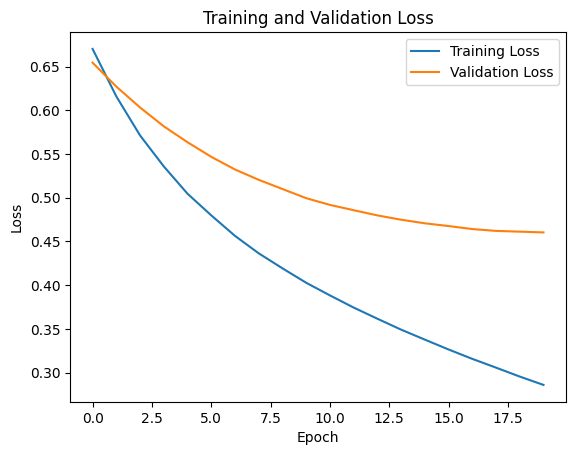

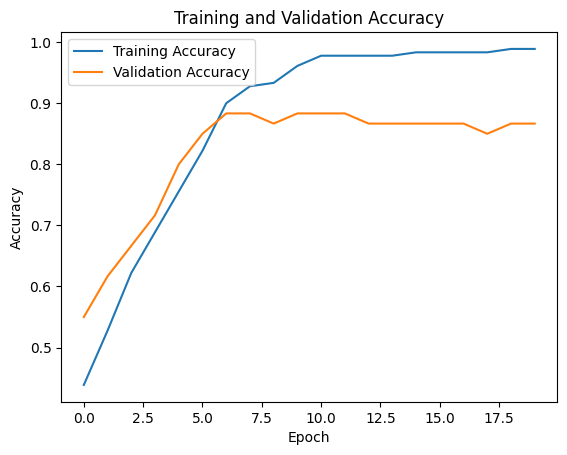

In [6]:
# Create labels for the data
num_samples, sample_rate = data.shape # num_samples = 240, sample_rate = 50

# create array for lables, 120 to represent not_moving (0), 120 to represent moving (1)
labels = np.concatenate((np.zeros(num_samples//2), np.ones(num_samples//2)))

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# x_train -> data y_train -> labels, use 75% for training/ 25% for testing 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sample_rate, )),
    tf.keras.layers.Dense(50, input_shape=(50,1), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# convert the model 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [8]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Model size (Header file)
- 12,112 unsigned chars
- 11.8 kb

In [9]:
# convert to a c header file 
!apt-get update && apt-get -qq install xxd
!xxd -i model.tflite > accel_model.h

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,774 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,057 kB]
Get:

In [10]:
print(X_test[5])
test = X_test[5]
test.shape
test = test.reshape(-1, sample_rate, 1)
print(model.predict(test))


[-1.15323602e-01  8.54031349e-02 -1.76313097e-01 -1.39687569e-01
 -2.73819032e-02  1.47111946e-01 -4.25620698e-03  7.68803546e-02
  6.05981968e-02  4.67417659e-02  2.28461716e-02 -1.34583586e-02
  9.05344473e-02  3.69236142e-02  1.10931587e-01  1.13799696e-01
 -1.57979004e-01  8.68750676e+00 -2.49933358e+00  6.32475299e-01
 -8.12800813e-01 -2.63942319e-02  5.84794679e-01  1.82289581e-01
  2.90402012e-01  1.98740751e-02  4.33837022e-02 -6.38490595e-02
  7.35960117e-01  6.32865177e-02 -3.40281753e-01 -4.07000127e-02
  1.44218111e-01 -6.85333157e-02  1.93970646e-01 -1.58087405e-01
 -1.81601991e-01  1.33703188e-01  2.71641163e-01 -2.24585461e-01
  1.42937429e-01  8.77880519e-02  2.65025093e-01  1.94522839e-01
  2.28628795e-02 -8.33483816e-02 -1.46141552e-01  5.93619395e-02
 -8.52565617e-02  8.51326219e-02]
1/1 [==============================] - 0s 133ms/step
[[0.92979026]]


In [11]:
#finding arbitrary data point that has strong inference to test in arduino
print(moving_data[18])

scaler_test = StandardScaler()
data_test = scaler.fit_transform(moving_data)

new_test = data_test[18]

testt = new_test.reshape(-1, sample_rate, 1)

print(model.predict(testt))

[1.   1.   1.   1.   1.58 0.77 1.03 0.89 0.87 1.08 0.97 0.97 1.03 1.01
 0.98 1.01 0.98 0.99 0.99 1.   1.   1.   0.99 1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.99 1.   0.99 1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]
1/1 [==============================] - 0s 55ms/step
[[0.8653187]]


In [12]:
#finding arbitrary data point that has strong inference to test in arduino
print(not_moving_data[29])

scaler_test = StandardScaler()
data_test = scaler.fit_transform(not_moving_data)

new_test = data_test[29]

testt = new_test.reshape(-1, sample_rate, 1)

print(model.predict(testt))

[1.   1.   1.   1.   0.99 0.99 1.   1.   1.   1.   1.   0.99 1.   0.99
 0.99 1.   1.01 0.98 1.   1.   0.99 0.99 1.   1.   1.   1.   1.   0.99
 1.   1.   0.99 1.   1.   1.   1.   1.   0.99 0.99 0.99 1.   1.   1.
 1.   1.   0.99 0.99 1.   0.99 1.   0.99]
1/1 [==============================] - 0s 36ms/step
[[0.36815122]]


In [24]:
print(raw_data[5])

[0.99 0.99 1.   0.99 1.   1.   1.   1.   1.   1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 0.99 1.   1.01 0.98 0.99 1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99
 0.99 1.   0.99 1.   1.   1.   1.   1.  ]


In [26]:
scaler_test = StandardScaler()
data_test = scaler.fit_transform(raw_data)

print(raw_data[5])
new_test = data_test[5]

testt = new_test.reshape(-1, sample_rate, 1)

print(model.predict(testt))

[0.99 0.99 1.   0.99 1.   1.   1.   1.   1.   1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 0.99 1.   1.01 0.98 0.99 1.   0.99 0.99 1.   1.
 1.   1.   1.   0.99 1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99
 0.99 1.   0.99 1.   1.   1.   1.   1.  ]
1/1 [==============================] - 0s 26ms/step
[[0.30599752]]
